Accuracy for KNN with 5 neighbors: 
0.9473684210526315
Precision for KNN with 5 neighbors: 
0.9577464788732394
Recall for KNN with 5 neighbors: 
0.9577464788732394
F1-score for KNN with 5 neighbors: 
0.9577464788732394


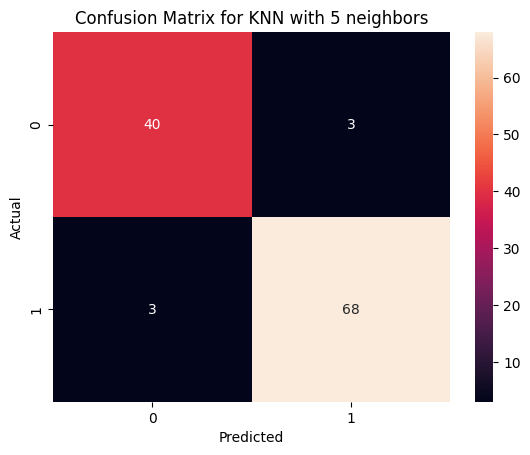



Accuracy for default Decision Tree Classifier: 
0.9473684210526315
Precision for default Decision Tree Classifier: 
0.9577464788732394
Recall for default Decision Tree Classifier: 
0.9577464788732394
F1-score for default Decision Tree Classifier: 
0.9577464788732394


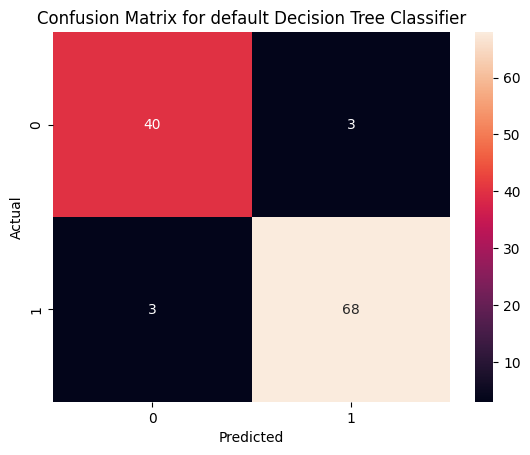



Accuracy for Random Forest Classifier n_estimators=100: 
0.9649122807017544
Precision for Random Forest Classifier n_estimators=100: 
0.958904109589041
Recall for Random Forest Classifier n_estimators=100: 
0.9859154929577465
F1-score for Random Forest Classifier n_estimators=100: 
0.9722222222222222


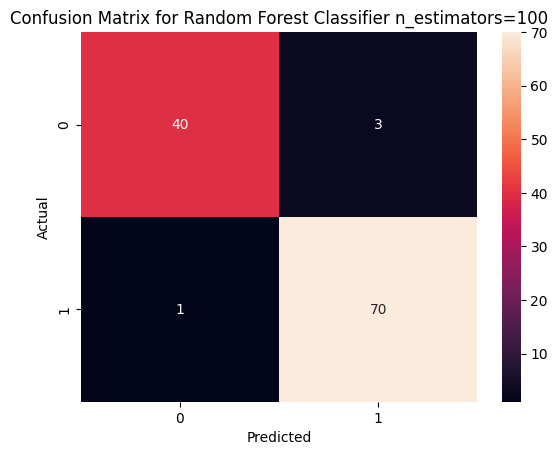



Modifying key hyperparameters for KNN, Decision Tress, and Random Forest to observe the impact on performance.


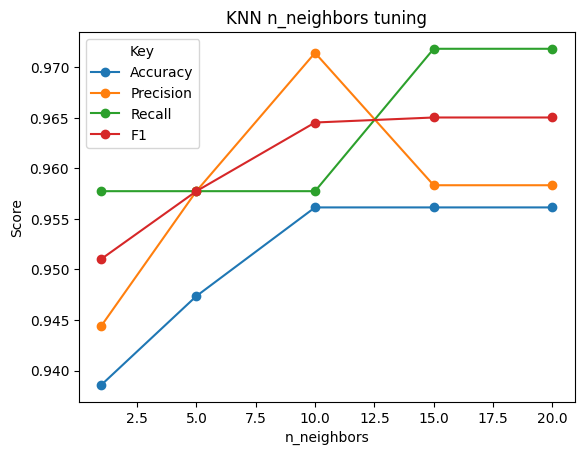

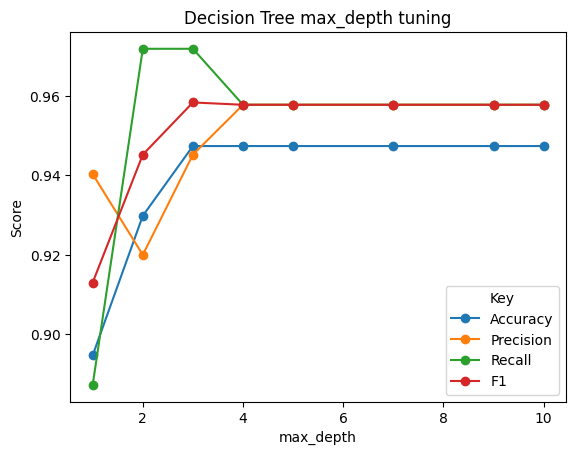

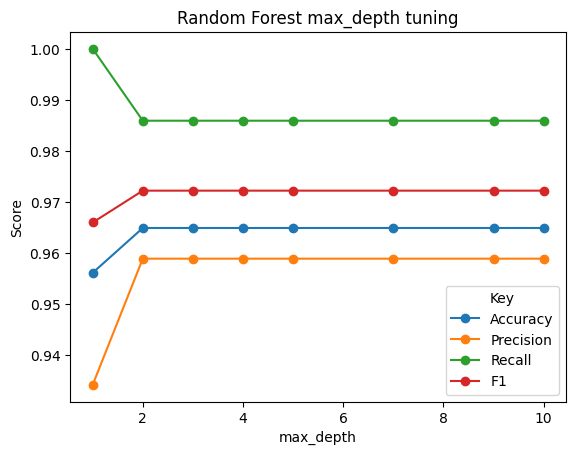

In [38]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt


# STEP 1-- Data preprocessing:

#Loading dataset
data = load_breast_cancer()

X, y = load_breast_cancer(return_X_y=True)

#Partitioning the data into 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scaling the features for KNN
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# STEP 2-- Model Training:

#KNN
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

#Decision Tree
dt = tree.DecisionTreeClassifier(random_state=42)

#Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

#Fitting to the model
knn = knn.fit(X_train_scaled, y_train)
dt = dt.fit(X_train, y_train)
rf = rf.fit(X_train, y_train)

# STEP 3-- Evaluation:
y_knn_pred = knn.predict(X_test_scaled)
y_dt_pred = dt.predict(X_test)
y_rf_pred = rf.predict(X_test)

#KNN model eval
accuracy_knn = accuracy_score(y_test, y_knn_pred)
precision_knn = precision_score(y_test, y_knn_pred)
recall_knn = recall_score(y_test, y_knn_pred)
f1_knn = f1_score(y_test, y_knn_pred)
cm_knn = confusion_matrix(y_test, y_knn_pred)

#Decision Tree model eval
accuracy_dt = accuracy_score(y_test, y_dt_pred)
precision_dt = precision_score(y_test, y_dt_pred)
recall_dt = recall_score(y_test, y_dt_pred)
f1_dt = f1_score(y_test, y_dt_pred)
cm_dt = confusion_matrix(y_test, y_dt_pred)

#Random Forest model eval
accuracy_rf = accuracy_score(y_test, y_rf_pred)
precision_rf = precision_score(y_test, y_rf_pred)
recall_rf = recall_score(y_test, y_rf_pred)
f1_rf = f1_score(y_test, y_rf_pred)
cm_rf = confusion_matrix(y_test, y_rf_pred)

print("Accuracy for KNN with 5 neighbors: ")
print(accuracy_knn)
print("Precision for KNN with 5 neighbors: ")
print(precision_knn)
print("Recall for KNN with 5 neighbors: ")
print(recall_knn)
print("F1-score for KNN with 5 neighbors: ")
print(f1_knn)
sns.heatmap(cm_knn, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for KNN with 5 neighbors")
plt.show()
print("\n")

print("Accuracy for default Decision Tree Classifier: ")
print(accuracy_dt)
print("Precision for default Decision Tree Classifier: ")
print(precision_dt)
print("Recall for default Decision Tree Classifier: ")
print(recall_dt)
print("F1-score for default Decision Tree Classifier: ")
print(f1_dt)
sns.heatmap(cm_dt, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for default Decision Tree Classifier")
plt.show()
print("\n")

print("Accuracy for Random Forest Classifier n_estimators=100: ")
print(accuracy_rf)
print("Precision for Random Forest Classifier n_estimators=100: ")
print(precision_rf)
print("Recall for Random Forest Classifier n_estimators=100: ")
print(recall_rf)
print("F1-score for Random Forest Classifier n_estimators=100: ")
print(f1_rf)
sns.heatmap(cm_rf, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest Classifier n_estimators=100")
plt.show()
print("\n")

#Ablation Study
print("Modifying key hyperparameters for KNN, Decision Tress, and Random Forest to observe the impact on performance.")

#Changing n_neighbors for KNN
neighbors_num = [1, 5, 10, 15, 20]

knn_acc = {}
knn_prec = {}
knn_recall = {}
knn_f1 = {}

for n in neighbors_num:
    knn = neighbors.KNeighborsClassifier(n_neighbors=n)
    knn = knn.fit(X_train_scaled, y_train)
    y_knn_pred = knn.predict(X_test_scaled)
    knn_acc[n] = accuracy_score(y_test, y_knn_pred)
    knn_prec[n] = precision_score(y_test, y_knn_pred)
    knn_recall[n] = recall_score(y_test, y_knn_pred)
    knn_f1[n] = f1_score(y_test, y_knn_pred)

plt.plot(neighbors_num, list(knn_acc.values()), marker='o', label="Accuracy")
plt.plot(neighbors_num, list(knn_prec.values()), marker='o', label="Precision")
plt.plot(neighbors_num, list(knn_recall.values()), marker='o', label="Recall")
plt.plot(neighbors_num, list(knn_f1.values()), marker='o', label="F1")
plt.legend(title="Key", loc="best")
plt.xlabel("n_neighbors")
plt.ylabel("Score")
plt.title("KNN n_neighbors tuning")
plt.show()

#Changing max_depth for Decision Trees
dt_depth = [1, 2, 3, 4, 5, 7, 9, 10]

dt_acc = {}
dt_prec = {}
dt_recall = {}
dt_f1 = {}

for n in dt_depth:
    dt = tree.DecisionTreeClassifier(random_state=42, max_depth=n)
    dt = dt.fit(X_train, y_train)
    y_dt_pred = dt.predict(X_test)
    dt_acc[n] = accuracy_score(y_test, y_dt_pred)
    dt_prec[n] = precision_score(y_test, y_dt_pred)
    dt_recall[n] = recall_score(y_test, y_dt_pred)
    dt_f1[n] = f1_score(y_test, y_dt_pred)

plt.plot(dt_depth, list(dt_acc.values()), marker='o', label="Accuracy")
plt.plot(dt_depth, list(dt_prec.values()), marker='o', label="Precision")
plt.plot(dt_depth, list(dt_recall.values()), marker='o', label="Recall")
plt.plot(dt_depth, list(dt_f1.values()), marker='o', label="F1")
plt.legend(title="Key", loc="best")
plt.xlabel("max_depth")
plt.ylabel("Score")
plt.title("Decision Tree max_depth tuning")
plt.show()

#Changing max_depth for Random Forest
rf_depth = [1, 2, 3, 4, 5, 7, 9, 10]

rf_acc = {}
rf_prec = {}
rf_recall = {}
rf_f1 = {}

for n in rf_depth:
    rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=n)
    rf = rf.fit(X_train, y_train)
    y_rf_pred = rf.predict(X_test)
    rf_acc[n] = accuracy_score(y_test, y_rf_pred)
    rf_prec[n] = precision_score(y_test, y_rf_pred)
    rf_recall[n] = recall_score(y_test, y_rf_pred)
    rf_f1[n] = f1_score(y_test, y_rf_pred)


plt.plot(rf_depth, list(rf_acc.values()), marker='o', label="Accuracy")
plt.plot(rf_depth, list(rf_prec.values()), marker='o', label="Precision")
plt.plot(rf_depth, list(rf_recall.values()), marker='o', label="Recall")
plt.plot(rf_depth, list(rf_f1.values()), marker='o', label="F1")
plt.legend(title="Key", loc="best")
plt.xlabel("max_depth")
plt.ylabel("Score")
plt.title("Random Forest max_depth tuning")
plt.show()